# Libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics


from google.colab import drive

local_folder = '/content/drive/'
drive.mount(local_folder)
data_folder = '/content/drive/MyDrive/Project2021/Colab_Notebooks/disaster_tweets/data'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data

In [117]:
train_original = pd.read_csv( '%s/train.csv'%(data_folder) )
test_original = pd.read_csv( '%s/test.csv'%(data_folder) )

X_train, X_test, y_train, y_test = train_test_split( train_original.text, train_original.target, test_size=0.2, random_state=42)

train = pd.DataFrame( np.transpose([X_train, y_train]), columns = ['text', 'target'] )
test = pd.DataFrame( np.transpose([X_test, y_test]), columns = ['text', 'target'] )

In [82]:
test

,text,target
0,So you have a new weapon that can cause un-ima...,1
1,The f$&amp;@ing things I do for #GISHWHES Just...,0
2,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
3,Aftershock back to school kick off was great. ...,0
4,in response to trauma Children of Addicts deve...,0
...,...,...
3802,#Nursing alert: Emergency Department Psychiatr...,1
3803,Mourning notices for stabbing arson victims st...,0
3804,We are getting some reports of flooding near J...,1
3805,Watch our video of Wendell Berry speaking abou...,1


In [20]:
train.location.value_counts()

USA                      104
New York                  71
United States             50
London                    45
Canada                    29
                        ... 
Selangor                   1
R'lyeh, South Pacific      1
Forging my Story           1
West Chester, PA           1
253                        1
Name: location, Length: 3341, dtype: int64

In [21]:
train.keyword.value_counts()

fatalities               45
armageddon               42
deluge                   42
body%20bags              41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [19]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [23]:
train.text.map( len )

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 7613, dtype: int64

In [24]:
train.text.map( len ).max()

157

In [25]:
train.text.map( len ).min()

7

In [28]:
"data science".split()

['data', 'science']

In [29]:
len("data science".split())

2

In [30]:
train.text.map( lambda x: len(x.split()) )

0       13
1        7
2       22
3        8
4       16
        ..
7608    11
7609    20
7610     8
7611    19
7612    13
Name: text, Length: 7613, dtype: int64

In [31]:
train.text.map( lambda x: len(x.split()) ).max()

31

In [32]:
train.text.map( lambda x: len(x.split()) ).min()

1

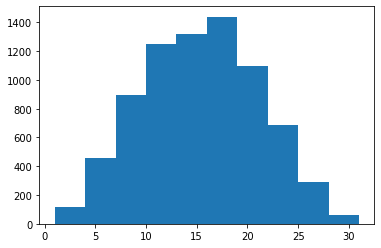

In [35]:
plt.hist(train.text.map( lambda x: len(x.split()) ))
plt.show()

In [36]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [38]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [44]:
train.target

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: object

# Model

In [118]:
import spacy

# Create an empty model
nlp = spacy.blank("en")

# Create the TextCategorizer with exclusive classes and "bow" architecture
textcat = nlp.create_pipe(
              "textcat",
              config={
                "exclusive_classes": True,
                "architecture": "bow"})

# Add the TextCategorizer to the empty model
nlp.add_pipe(textcat)

In [119]:
train.target = train.target.map( str )

In [120]:
textcat.add_label("0")
textcat.add_label("1")

1

In [121]:
train['text'].values

array(['Courageous and honest analysis of need to use Atomic Bomb in 1945. #Hiroshima70 Japanese military refused surrender. https://t.co/VhmtyTptGR',
       '@ZachZaidman @670TheScore wld b a shame if that golf cart became engulfed in flames. #boycottBears',
       "Tell @BarackObama to rescind medals of 'honor' given to US soldiers at the Massacre of Wounded Knee. SIGN NOW &amp; RT! https://t.co/u4r8dRiuAc",
       ...,
       'Omron HEM-712C Automatic Blood Pressure Monitor STANDARD AND LARGE BP CUFFS http://t.co/gJBAInQWN9 http://t.co/jPhgpL1c5x',
       'Officials say a quarantine is in place at an Alabama home over a possible Ebola case after developing symptoms... http://t.co/rqKK15uhEY',
       'I moved to England five years ago today. What a whirlwind of time it has been! http://t.co/eaSlGeA1B7'],
      dtype=object)

In [122]:
train_texts = train['text'].values
train_labels = [{'cats': {'0': label == '0',
                          '1': label == '1'}} 
                for label in train['target']]

In [123]:
train_labels[:5]

[{'cats': {'0': False, '1': True}},
 {'cats': {'0': True, '1': False}},
 {'cats': {'0': False, '1': True}},
 {'cats': {'0': False, '1': True}},
 {'cats': {'0': True, '1': False}}]

In [124]:
for i, j in zip( [1,2,3], ["apple", "orange", "mango"] ):
  print(i,j)

1 apple
2 orange
3 mango


In [125]:
train_data = list(zip(train_texts, train_labels))
train_data[:3]

[('Courageous and honest analysis of need to use Atomic Bomb in 1945. #Hiroshima70 Japanese military refused surrender. https://t.co/VhmtyTptGR',
  {'cats': {'0': False, '1': True}}),
 ('@ZachZaidman @670TheScore wld b a shame if that golf cart became engulfed in flames. #boycottBears',
  {'cats': {'0': True, '1': False}}),
 ("Tell @BarackObama to rescind medals of 'honor' given to US soldiers at the Massacre of Wounded Knee. SIGN NOW &amp; RT! https://t.co/u4r8dRiuAc",
  {'cats': {'0': False, '1': True}})]

In [126]:
import random

random.seed(1)
spacy.util.fix_random_seed(1)
optimizer = nlp.begin_training()

losses = {}
for epoch in range(20):
    random.shuffle(train_data)
    # Create the batch generator with batch size = 8
    batches = minibatch(train_data, size=8)
    # Iterate through minibatches
    for batch in batches:
        # Each batch is a list of (text, label) but we need to
        # send separate lists for texts and labels to update().
        # This is a quick way to split a list of tuples into lists
        texts, labels = zip(*batch)
        nlp.update(texts, labels, sgd=optimizer, losses=losses)
    print(losses)

{'textcat': 4.458206996670924}
{'textcat': 7.045764244016027}
{'textcat': 8.794316488594632}
{'textcat': 10.038819828347187}
{'textcat': 11.27490401975956}
{'textcat': 12.001954207786184}
{'textcat': 12.58237767595665}
{'textcat': 13.062224397008322}
{'textcat': 13.474522126855618}
{'textcat': 13.804815939288687}
{'textcat': 14.081104664053441}
{'textcat': 14.31962208266657}
{'textcat': 14.532074402484227}
{'textcat': 14.739500647239495}
{'textcat': 14.90184514956939}
{'textcat': 15.050467246072838}
{'textcat': 15.183914951583553}
{'textcat': 15.302452748497203}
{'textcat': 15.417969246148381}
{'textcat': 15.525719456181905}


In [127]:
texts = test.text
docs = [nlp.tokenizer(text) for text in texts]
    
# Use textcat to get the scores for each doc
textcat = nlp.get_pipe('textcat')
scores, _ = textcat.predict(docs)

print(scores)

[[9.5107901e-01 4.8921011e-02]
 [4.9175873e-01 5.0824124e-01]
 [9.1658318e-01 8.3416820e-02]
 ...
 [2.0251751e-02 9.7974819e-01]
 [1.3482177e-05 9.9998653e-01]
 [2.3242003e-01 7.6757997e-01]]


In [128]:
predicted_labels = scores.argmax(axis=1)
print([textcat.labels[label] for label in predicted_labels])

['0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0',

In [129]:
sum(predicted_labels == 0)

894

In [130]:
sum(predicted_labels == 1)

629

In [135]:
for l, t in zip(test.target[ predicted_labels == 1 ][:20], test.text[ predicted_labels == 1 ][:20]):
  print(l, t)

0 The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@
0 in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3
1 @brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump stripe reader. 1 person told me it crashed the POS
1 The Murderous Story Of AmericaÛªs First Hijacking http://t.co/EYUGk6byxr
1 AKILAH WORLD NEWS Cop pulls man from car to avoid this ... http://t.co/Vn2Fnmy7li
0 Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her
 
#FARRAKHAN #QUOTE
1 Malaysia Airlines Flight 370 that Disappeared 17months ago Debris Found South of The Indian Ocean - http://t.co/nrHURYSyPd
1 Nepal earthquake 3 months on: Women fear abuse https://t.co/iCTtZ0Divr via @@loupascale
0 Escape The Heat (and the #ORShow) for a trail run on Desolation Loop you'll be glad you did http://t.co/n2ucNzh

In [132]:
for t in test.text[ predicted_labels == 0 ][:20]:
  print(t)

So you have a new weapon that can cause un-imaginable destruction.
DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q
Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.
@Calum5SOS you look like you got caught in a rainstorm this is amazing and disgusting at the same time
my favorite lady came to our volunteer meeting
hopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS
Can't find my ariana grande shirt  this is a fucking tragedy
We walk the plank of a sinking ship
@Zak_Bagans pets r like part of the family. I love animals.??? The last 2 pets I had I rescued! Breaks my heart when animals are mistreated????
ON THE USE OF PERFORATED METAL SHEAR PANEL SFOR SEISMIC-RESISTANT APPLICATIONS http://t.co/cX5OjH2Dr4
The answer my friend is yelling in the wind-my latest article for http://t.co/LbMeKYphM5.Pls read and share - thanks! http

In [133]:
sum(test.target == predicted_labels)

1171

In [134]:
len(test)

1523

In [141]:
print(metrics.classification_report(test.target.map(int), predicted_labels))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       874
           1       0.74      0.71      0.72       649

    accuracy                           0.77      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523

